#### 1 WT4, DJF
 - 1) Find the top 25% of years that have the highest frequency of WT4 in DJF
 - 2) Calculate the seasonal mean Z500 for those top 25% of years.
 - 3) Read the seasonal mean over all years. 
 - 4) Plot the anomaly of the top 25% of years (P75-climatoloty)/stddev(climatoloty) 
#### 2 WT9 JAS

In [1]:
import sys
import datetime
import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import xarray as xr
import matplotlib.pyplot as plt
import glob 
import os.path
import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# inorder to import my pathon module, add
# $PYTHONPATH for jupyter for module
sys.path.append("/glade/u/home/mingge/PYTHON")
import coexist_func 
from importlib import reload
reload(coexist_func)
from coexist_func import plot_single
from coexist_func import find_year_top25_wt_ecmwf
from coexist_func import cal_seasonalmean_wt
from coexist_func import cal_season_std
from coexist_func import ax_coastlines_country

casper_2020

#### setups

In [2]:
dir_ecmwf = '/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/sst/'
dir_wt = '/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/WT_01/'

season_dict = {
    'DJF': [12,1,2],
    'MAM': [3,4,5],
    'JJA': [6,7,8],
    'SON': [9,10,11],
    'JAS': [7,8,9]}

n_season = len(season_dict)

year_s = 1993
year_e = 2021
n_year = year_e - year_s + 1

n_wt = 12

### check on data

In [3]:
flnm_test = dir_ecmwf + 'sst_201702.grib'
ds = xr.load_dataset(flnm_test, engine="cfgrib")
print('original sst dataset')
print(ds.dims)

sst = ds.sst.squeeze(drop=True) 
 
n_mem  = ds.dims['number']
n_fcst = ds.dims['step']
n_lat  = ds.dims['latitude']
n_lon  = ds.dims['longitude']

#### only member 1-25, member 26-51 starts from 2017
n_mem  = 25

latitude = ds['latitude']
longitude = ds['longitude'] 

Ignoring index file '/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/sst/sst_201702.grib.923a8.idx' older than GRIB file


original sst dataset
Frozen({'number': 51, 'step': 215, 'latitude': 101, 'longitude': 360})


#### 1.1) Find the top 25% of years that have the highest frequency of  WT4 in DJF

In [4]:
# for winter DJF season_dict[1]
key = 'DJF'

# target WT 4
wt_t = 4

year_s = 1993
year_e = 2021

ct_1d = find_year_top25_wt_ecmwf(year_s, year_e, season_dict, dir_ecmwf,dir_wt, wt_t, key) 

ct_df = pd.DataFrame(data=ct_1d, columns=['sst'], index=range(year_s, year_e+1,1))
ct_sort = ct_df.sort_values(by=['sst'])

year_p75 = ct_sort.index[:int(n_year*0.25)]
print('top 25% years are', year_p75) 

member 1 -  25
top 25% years are Int64Index([2006, 2008, 2010, 1998, 2021, 2011, 1996], dtype='int64')


 - 1.2) Calculate the seasonal mean SST for those top 25% of years.

In [5]:
flnm_o = dir_ecmwf + 'sst_p75_wt' + str(wt_t) + '_'+ key +'.nc'
sst_p75_2d_xr = cal_seasonalmean_wt('sst', dir_ecmwf, season_dict, key, year_p75, latitude, longitude, flnm_o)

/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/sst/sst_p75_wt4_DJF.nc exist
mean of member 1-25 
Frozen({'latitude': 101, 'longitude': 360})


- 1.3) read the seasonal mean and STD over all years

In [7]:
flnm_o = dir_ecmwf + 'sst_'+ key +'_MeanStd.nc'
sst_cli_xr = cal_season_std('sst', dir_ecmwf, season_dict, key, year_s, year_e, latitude, longitude, flnm_o)
sst_xr = sst_cli_xr[0]
sst_std_xr= sst_cli_xr[1]

/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/sst/sst_DJF_MeanStd.nc exist
sst mean of member 1-25 
Frozen({'mean_std': 2, 'latitude': 101, 'longitude': 360})


 - 1.4) Plot the anomaly of the top 25% of years (P75-climatoloty)/stddev(climatoloty) 

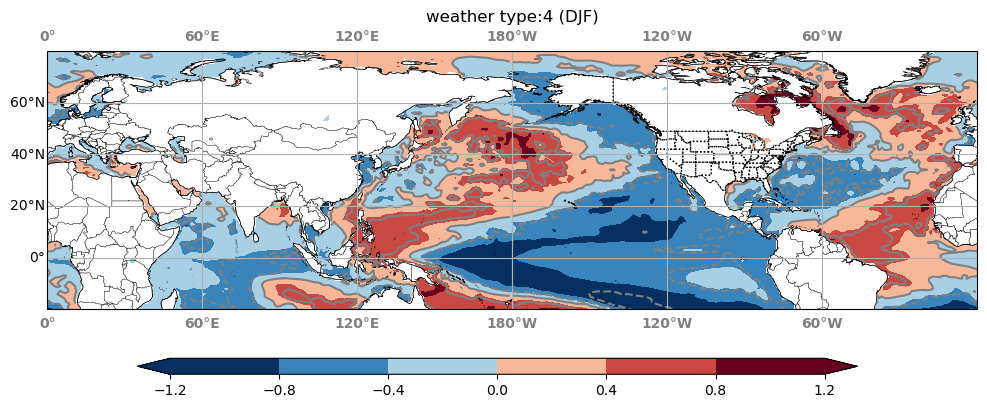

In [9]:
ano_2d = (sst_p75_2d_xr - sst_xr)/sst_std_xr
plot_single(ano_2d, wt_t, key)

#### WT9 (wet monsoon) for JAS.

2.1) Find the top 25% of years that have the highest frequency of WT9 in JAS

In [10]:
# for winter DJF season_dict[1]
key = 'JAS'

# target WT 9
wt_t = 9

year_s = 1993
year_e = 2021

ct_1d = find_year_top25_wt_ecmwf(year_s, year_e, season_dict, dir_ecmwf, dir_wt, wt_t, key) 

member 1 -  25


In [11]:
ct_df = pd.DataFrame(data=ct_1d, columns=['sst'], index=range(year_s, year_e+1,1))
ct_sort = ct_df.sort_values(by=['sst'])
#print(ct_sort)
year_p75 = ct_sort.index[:int(n_year*0.25)]
print('top 25% years are', year_p75) 

top 25% years are Int64Index([2010, 2011, 2008, 2005, 2012, 1998, 2006], dtype='int64')


 - 2.2) Calculate the seasonal mean SST for those top 25% of years.

In [12]:
flnm_o = dir_ecmwf + 'sst_p75_wt' + str(wt_t) + '_'+ key +'.nc'
sst_p75_2d_xr = cal_seasonalmean_wt('sst', dir_ecmwf, season_dict, key, year_p75, latitude, longitude, flnm_o)


/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/sst/sst_p75_wt9_JAS.nc exist
mean of member 1-25 
Frozen({'latitude': 101, 'longitude': 360})


 - 2.3) read the seasonal mean and STD over all years

In [14]:
flnm_o = dir_ecmwf + 'sst_'+ key +'_MeanStd.nc'
sst_cli_xr = cal_season_std('sst', dir_ecmwf, season_dict, key, year_s, year_e, latitude, longitude, flnm_o)
sst_xr = sst_cli_xr[0]
sst_std_xr= sst_cli_xr[1]

/glade/campaign/mmm/c3we/mingge/COEXIST/ECMWF/sst/sst_JAS_MeanStd.nc exist
sst mean of member 1-25 
Frozen({'mean_std': 2, 'latitude': 101, 'longitude': 360})


 - 2.4) Plot the anomaly of the top 25% of years (P75-climatoloty)/stddev(climatoloty) 

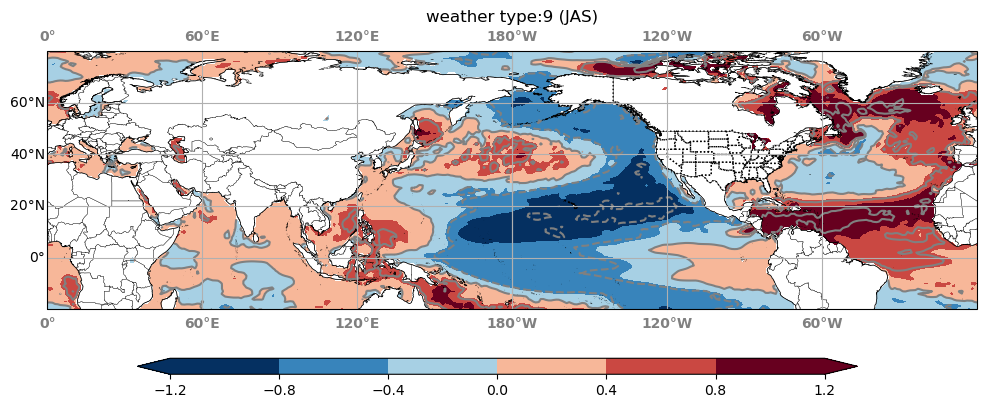

In [15]:
ano_2d = (sst_p75_2d_xr - sst_xr)/sst_std_xr
plot_single(ano_2d, wt_t, key)